In [1]:
from sklearn.datasets import fetch_openml
 
# load dataset
titanic = fetch_openml('titanic', version=1, as_frame=True)
df = titanic['data']
df['survived'] = titanic['target']

In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
 
from sklearn.datasets import fetch_openml
sns.set()

In [3]:
df.head(3)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0


In [4]:
df.describe()

,pclass,age,sibsp,parch,fare,body
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   float64 
 5   parch      1309 non-null   float64 
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
 13  survived   1309 non-null   category
dtypes: category(3), float64(6), object(5)
memory usage: 116.8+ KB


In [6]:
df.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
survived        0
dtype: int64

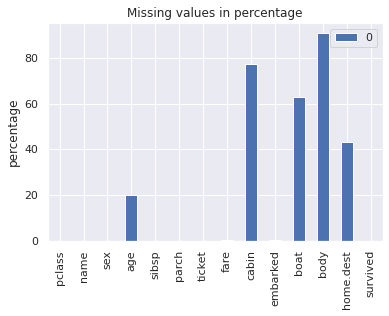

In [7]:
miss_vals = pd.DataFrame(df.isnull().sum() / len(df) * 100)
miss_vals.plot(kind='bar',
    title='Missing values in percentage',
    ylabel='percentage'
    )
 
plt.show()

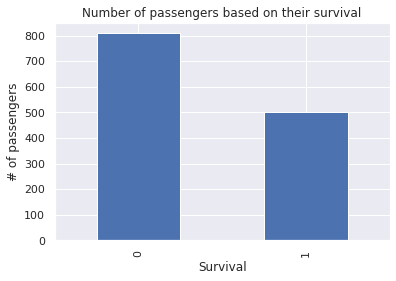

In [8]:
df.survived.value_counts().plot(kind='bar')
 
plt.xlabel('Survival')
plt.ylabel('# of passengers')
plt.title('Number of passengers based on their survival')
plt.show()

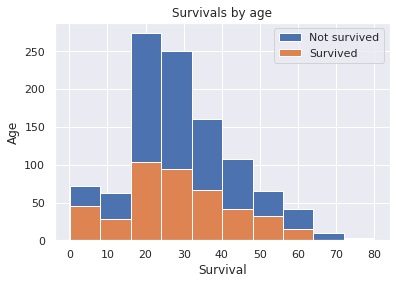

In [9]:
fig, ax = plt.subplots()
 
ax.hist(df.age.dropna(), label='Not survived')
ax.hist(df['age'][df.survived == '1'].dropna(), label='Survived')
 
plt.xlabel('Survival')
plt.ylabel('Age')
plt.title('Survivals by age')
plt.legend()
plt.show()

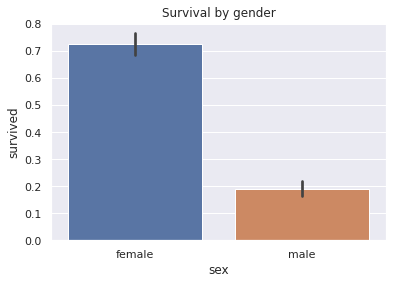

In [10]:
df['survived'] = df.survived.astype('int')
 
sns.barplot(
    x='sex',
    y='survived',
    data=df
)
 
plt.title('Survival by gender')
plt.show()

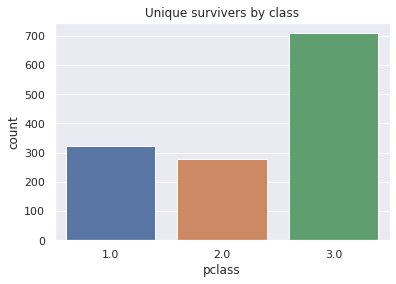

In [11]:
sns.countplot(x='pclass', data=df)
plt.title('Unique survivers by class')
plt.show()

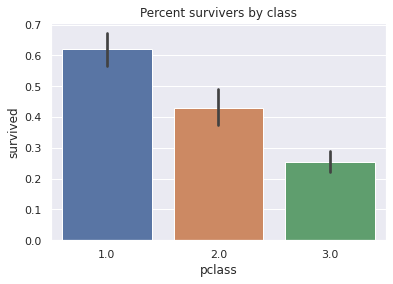

In [12]:
sns.barplot(x='pclass', y='survived', data=df)
plt.title('Percent survivers by class')
plt.show()

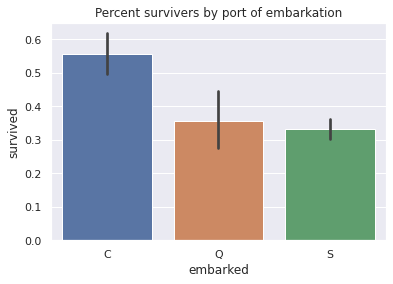

In [13]:
sns.barplot(x='embarked', y='survived', data=df)
plt.title('Percent survivers by port of embarkation')
plt.show()

In [14]:
from sklearn.datasets import fetch_openml
 
# load dataset
titanic = fetch_openml('titanic', version=1, as_frame=True)
df = titanic['data']
df['survived'] = titanic['target']
 
# Assign Dependent and Independent variables
X = df.drop('survived', axis=1)
y = df['survived']

In [15]:
from sklearn.datasets import fetch_openml
 
X, y = fetch_openml('titanic', version=1, as_frame=True, return_X_y=True)


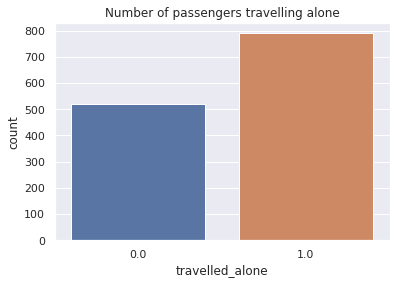

In [16]:
X['family'] = X['sibsp'] + X['parch']
X.loc[X['family'] > 0, 'travelled_alone'] = 0
X.loc[X['family'] == 0, 'travelled_alone'] = 1
X.drop(['family', 'sibsp', 'parch'], axis=1, inplace=True)
sns.countplot(x='travelled_alone', data=X)
plt.title('Number of passengers travelling alone')
plt.show()

In [17]:
# remove high missing value columns
X.drop(['cabin', 'boat', 'body'], axis=1, inplace=True)
 
# remove less interesting features
X.drop(['name','ticket','home.dest'], axis=1, inplace=True)


In [18]:
from sklearn.impute import SimpleImputer
 
def get_parameters(df):
    parameters = {}
    for col in df.columns[df.isnull().any()]:
        if df[col].dtype == 'float64' or df[col].dtype == 'int64' or df[col].dtype =='int32':
            strategy = 'mean'
        else:
            strategy = 'most_frequent'
        missing_values = df[col][df[col].isnull()].values[0]
        parameters[col] = {'missing_values':missing_values, 'strategy':strategy}
    return parameters
 
parameters = get_parameters(X)
 
for col, param in parameters.items():
    missing_values = param['missing_values']
    strategy = param['strategy']
    imp = SimpleImputer(missing_values=missing_values, strategy=strategy)
    X[col] = imp.fit_transform(X[[col]])
 
X.isnull().sum()

pclass             0
sex                0
age                0
fare               0
embarked           0
travelled_alone    0
dtype: int64

In [19]:
# handle categorical data
cat_cols = X.select_dtypes(include=['object','category']).columns
dummies = pd.get_dummies(X[cat_cols], drop_first=True)
X[dummies.columns] = dummies
X.drop(cat_cols, axis=1, inplace=True)
X.head()

,pclass,age,fare,travelled_alone,sex_male,embarked_Q,embarked_S
0,1.0,29.0000,211.3375,1.0,0,0,1
1,1.0,0.9167,151.5500,0.0,1,0,1
2,1.0,2.0000,151.5500,0.0,0,0,1
3,1.0,30.0000,151.5500,0.0,1,0,1
4,1.0,25.0000,151.5500,0.0,0,0,1


In [20]:
# Scale numeric data
from sklearn.preprocessing import StandardScaler
 
# Select numerical columns
num_cols = X.select_dtypes(include=['int64', 'float64', 'int32']).columns
 
# Apply StandardScaler
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])


In [21]:
from sklearn.model_selection import train_test_split
 
RAND_STATE = 42
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RAND_STATE)


In [22]:
cross_val_scores = {}
 
models = [
    'LogisticRegression', 
    'KNeighborsClassifier',
    'SVC',
    'RandomForestClassifier',
    'DecisionTreeClassifier'
    ]
 
empty_dict = {
    'best_score':'',
    'best_params':'',
    'score':''
    }
 
for m in models:
    cross_val_scores[m] = empty_dict
 
cross_val_scores

{'DecisionTreeClassifier': {'best_params': '', 'best_score': '', 'score': ''},
 'KNeighborsClassifier': {'best_params': '', 'best_score': '', 'score': ''},
 'LogisticRegression': {'best_params': '', 'best_score': '', 'score': ''},
 'RandomForestClassifier': {'best_params': '', 'best_score': '', 'score': ''},
 'SVC': {'best_params': '', 'best_score': '', 'score': ''}}

In [23]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
 
params = {
    'C': [0.001, 0.01, 0.1, 1.],
    'penalty': ['l1', 'l2']
}
 
log_reg = LogisticRegression(
    random_state=RAND_STATE, 
    class_weight='balanced',
    solver='liblinear'
    )
 
log_reg_cv = GridSearchCV(
    log_reg, 
    param_grid=params, 
    cv=5,
    scoring='accuracy',
)
 
log_reg_cv.fit(X_train, y_train)
 
cross_val_scores['LogisticRegression']['best_score'] = log_reg_cv.best_score_
cross_val_scores['LogisticRegression']['best_params'] = log_reg_cv.best_params_
cross_val_scores['LogisticRegression']['score'] = log_reg_cv.score(X_test, y_test)


CPU times: user 334 ms, sys: 893 µs, total: 335 ms
Wall time: 337 ms


In [24]:
%%time
import numpy as np 
 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
 
params = {'n_neighbors': np.arange(1, 50)}
 
knn = KNeighborsClassifier()
 
knn_cv = GridSearchCV(
    knn, 
    param_grid=params,
    cv=5,
    scoring='accuracy'
    )
 
knn_cv.fit(X_train, y_train)
 
cross_val_scores['KNeighborsClassifier']['best_score'] = knn_cv.best_score_
cross_val_scores['KNeighborsClassifier']['best_params'] = knn_cv.best_params_
cross_val_scores['KNeighborsClassifier']['score'] = knn_cv.score(X_test, y_test)


CPU times: user 3.48 s, sys: 66.8 ms, total: 3.55 s
Wall time: 3.53 s


In [25]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
 
params = {
    'C': [0.001, 0.01, 0.1, 1.],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
}
 
svc = SVC(
    random_state=RAND_STATE,
    class_weight='balanced',
    probability=True,
)
 
svc_cv = GridSearchCV(
    svc, 
    param_grid=params, 
    cv=5,
    scoring='accuracy',
)
 
svc_cv.fit(X_train, y_train)
 
cross_val_scores['SVC']['best_score'] = svc_cv.best_score_
cross_val_scores['SVC']['best_params'] = svc_cv.best_params_
cross_val_scores['SVC']['score'] = svc_cv.score(X_test, y_test)


CPU times: user 27.6 s, sys: 67.6 ms, total: 27.7 s
Wall time: 34.6 s


In [26]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
 
params = {
    'n_estimators': [5, 10, 15, 20, 25], 
    'max_depth': [3, 5, 7, 9, 11, 13],
}
rand_forest = RandomForestClassifier(
    random_state=RAND_STATE,
    class_weight='balanced',
)
 
rf_cv = GridSearchCV(
    rand_forest, 
    param_grid=params, 
    cv=5,
    scoring='accuracy',
)
 
rf_cv.fit(X_train, y_train)
 
cross_val_scores['RandomForestClassifier']['best_score'] = rf_cv.best_score_
cross_val_scores['RandomForestClassifier']['best_params'] = rf_cv.best_params_
cross_val_scores['RandomForestClassifier']['score'] = rf_cv.score(X_test, y_test)


CPU times: user 5.21 s, sys: 45.1 ms, total: 5.25 s
Wall time: 5.27 s


In [27]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
 
params = {
    'max_depth': [3, 5, 7, 9, 11, 13],
}
 
decision_tree = DecisionTreeClassifier(
    random_state=RAND_STATE,
    class_weight='balanced',
)
 
dt_cv = GridSearchCV(
    decision_tree, 
    param_grid=params, 
    cv=5,
    scoring='accuracy',
)
 
dt_cv.fit(X_train, y_train)
 
cross_val_scores['DecisionTreeClassifier']['best_score'] = dt_cv.best_score_
cross_val_scores['DecisionTreeClassifier']['best_params'] = dt_cv.best_params_
cross_val_scores['DecisionTreeClassifier']['score'] = dt_cv.score(X_test, y_test)


CPU times: user 219 ms, sys: 1.01 ms, total: 221 ms
Wall time: 221 ms


In [28]:
pd.DataFrame(cross_val_scores).T.sort_values(by='best_score',ascending=False)


,best_score,best_params,score
LogisticRegression,0.805702,{'max_depth': 3},0.798982
KNeighborsClassifier,0.805702,{'max_depth': 3},0.798982
SVC,0.805702,{'max_depth': 3},0.798982
RandomForestClassifier,0.805702,{'max_depth': 3},0.798982
DecisionTreeClassifier,0.805702,{'max_depth': 3},0.798982


In [29]:
import pandas as pd 
import matplotlib.pyplot as plt
 
from sklearn.datasets import fetch_openml
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
 
# Set random state for reproducibility
RAND_STATE = 42
 
# load data
X, y = fetch_openml('titanic', version=1, as_frame=True, return_X_y=True)
 
# preprocessing
X['family'] = X['sibsp'] + X['parch']
X.loc[X['family'] > 0, 'travelled_alone'] = 0
X.loc[X['family'] == 0, 'travelled_alone'] = 1
X.drop(['family', 'sibsp', 'parch'], axis=1, inplace=True)
X.drop(['cabin', 'boat', 'body'], axis=1, inplace=True)
X.drop(['name','ticket','home.dest'], axis=1, inplace=True)
 
# handle numeric features
numeric_features = ['age','fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])
 
# handle categorical features
categorical_features = ['embarked', 'sex', 'pclass', 'travelled_alone']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', OneHotEncoder(handle_unknown='ignore'))])
 
# Create a transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
 
# Run the classifier
classifier = DecisionTreeClassifier(
    random_state=RAND_STATE,
    class_weight='balanced',
    max_depth=3
    )
   
# Split into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RAND_STATE)
 
# Set the Pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
 
# Fit the pipeline
model.fit(X_train, y_train)
 
# Predict
y_pred = model.predict(X_test)
 
# Evaluate
print(f'Model score: {model.score(X_test, y_test)}')
 
# compute the classification report
print(classification_report(y_test, y_pred))

Model score: 0.7989821882951654
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       224
           1       0.80      0.72      0.75       169

    accuracy                           0.80       393
   macro avg       0.80      0.79      0.79       393
weighted avg       0.80      0.80      0.80       393



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


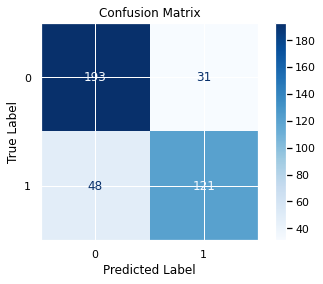

In [30]:
from sklearn.metrics import classification_report, plot_confusion_matrix
# plot confusion matrix
color = 'black'
matrix = plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()